In [9]:
#############################importing libraries and data set
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size = 14)
sns.set(style='white')

raw = pd.read_csv('income.csv')
shape = raw.shape
%matplotlib inline

% of rich and poor is : 24.89307383707437 , 75.10692616292563


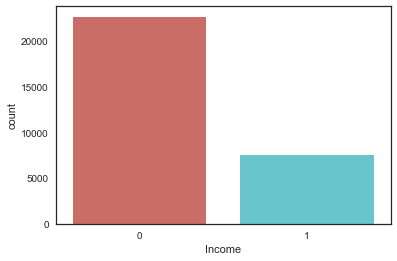

In [10]:
############################preprocessing
raw.isna().any()
raw.dropna()
#dependent columns deletion
raw.drop(columns=['education', 'relationship'], inplace=True)
#renaming y variable to Income
raw = raw.rename(columns = {'Other' : 'Income'})
#dtypes of columns
dty =raw.dtypes
#uniques values in each columns
uni = [raw[col].unique() for col in raw]
#removing rows containig ' ?' value in columns
for col in ['workclass', 'occupation', 'native-country']:
    raw = raw[raw[col] != ' ?']
#uniques values in each columns again all ? are gone now
uni = [raw[col].unique() for col in raw]
del(col)
#######################finding relation between varibles now
#changin >50 to 1 and <=50 to 0 this is coz
#we can directly see the relation with Income now 
rcol = {'Income' : {' <=50K':0, ' >50K': 1 }}
data = raw.replace(rcol, regex=True)
y = data['Income']
y.value_counts()    
sns.countplot(x=y, data=data, palette='hls')
#calculating relationshp
rich = len(data[y == 1])
poor = len(data[y == 0])
print('% of rich and poor is : '+str(rich/len(y)*100)+' , '+str(poor/len(y)*100))

In [11]:
################Label encoding
cat_vars = ['workclass', 'marital-status', 'occupation', 'race', 'sex','native-country']

from sklearn.preprocessing import LabelEncoder
LEX = LabelEncoder()
for col in ['workclass', 'marital-status', 'occupation', 'race', 'sex','native-country']:
    data.loc[:, col] = LEX.fit_transform(data.loc[:, col])
dty =data.dtypes

In [12]:
################One hot encoding
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    df=data.join(cat_list)
    data = df

#droping original cat columns
data.drop(columns=cat_vars, inplace=True)

In [13]:
###################### splitting the data
X = data.loc[:, data.columns != 'Income']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [6]:
#-------------------------------naive bayes-----------------------------
################### model buildig type 1
"""no feature scaling because feature scaling will reduce the accuracy and c-matrix
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 
#at second case we just transformed coz its already splitted
"""
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

y_pred = GNB.predict(X_test)

In [7]:
#################### predecting result
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
acc = metrics.classification_report(y_test, y_pred)
print(cm)
print(accuracy)
print(acc)

[[5416  315]
 [1290  520]]
0.7871635061662909
             precision    recall  f1-score   support

          0       0.81      0.95      0.87      5731
          1       0.62      0.29      0.39      1810

avg / total       0.76      0.79      0.76      7541



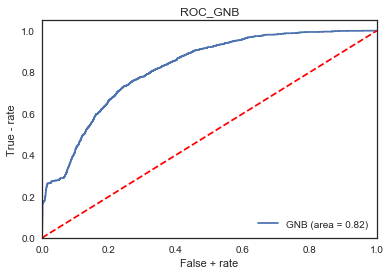

In [8]:
################## ROC Curve
Logit_roc_Dtree = metrics.roc_auc_score(y_test, GNB.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, GNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % Logit_roc_Dtree)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False + rate')
plt.ylabel('True - rate')
plt.title('ROC_GNB')
plt.legend(loc="lower right")
plt.savefig('ROC_GNB')
plt.show()

<h5>this is with feature scaling</h5>

In [14]:
#-------------------------------naive bayes-----------------------------
################### model buildig type 1
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

y_pred = GNB.predict(X_test)

In [15]:
#################### predecting result
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)
acc = metrics.classification_report(y_test, y_pred)
print(cm)
print(accuracy)
print(acc)

[[1160 4571]
 [  54 1756]]
0.38668611589974805
             precision    recall  f1-score   support

          0       0.96      0.20      0.33      5731
          1       0.28      0.97      0.43      1810

avg / total       0.79      0.39      0.36      7541



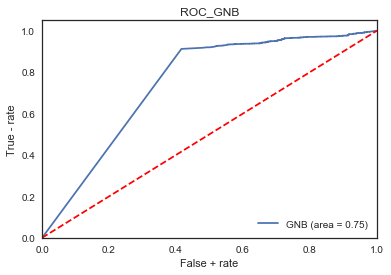

In [16]:
################## ROC Curve
Logit_roc_Dtree = metrics.roc_auc_score(y_test, GNB.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = metrics.roc_curve(y_test, GNB.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % Logit_roc_Dtree)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False + rate')
plt.ylabel('True - rate')
plt.title('ROC_GNB')
plt.legend(loc="lower right")
plt.savefig('ROC_GNB')
plt.show()